**SENTIMENT ANALYSIS FOR FINANCIAL NEWS FROM THE PERSPECTIVE OF A RETIAL INVESTOR**

**->3 categories:**


-positive

-negative

-neutral

DATASET:

https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news



In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

plt.style.use(style='seaborn')
%matplotlib inline

In [ ]:
df=pd.read_csv('all-data.csv',encoding = "ISO-8859-1", header=None, names = ['Sentiment', 'News Headline'])
df.head()

,Sentiment,News Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4846 non-null   object
 1   News Headline  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [ ]:
df.isna().sum()

Sentiment        0
News Headline    0
dtype: int64

In [ ]:
df['Sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

**Feature extraction**

In [ ]:
y=df['Sentiment'].values
y.shape

(4846,)

In [ ]:
x=df['News Headline'].values
x.shape

(4846,)

**Train-test split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)

In [ ]:
x_train.shape

(2907,)

In [ ]:
y_train.shape

(2907,)

In [ ]:
x_test.shape

(1939,)

In [ ]:
y_test.shape

(1939,)

In [ ]:
x_train

array(['Its main business area , the Glass Machinery Group of Glaston Technologies , is the global market leader in glass processing machines .',
       'Olvi has posted a strong set of figures for the first six months of this year .',
       'Prices and delivery volumes of broadband products decreased significantly in 2005 .',
       ...,
       'Pentik+Æinen emphasises that the most of the internet contents media houses provide can not be free forever .',
       'Being successful requires providing a level of quality that satisfies our customers and partners .',
       'An EU law on the issue may be introduced around 2010 .'],
      dtype=object)

In [ ]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})

df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

df_train.head()

,news,sentiment
0,"Its main business area , the Glass Machinery G...",positive
1,Olvi has posted a strong set of figures for th...,positive
2,Prices and delivery volumes of broadband produ...,negative
3,The online ice chart shows no ice in the area ...,neutral
4,Profit for the period was EUR 15.6 mn compared...,positive


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       2907 non-null   object
 1   sentiment  2907 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


In [ ]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})

df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

df_test.head()

,news,sentiment
0,The soapstone deposits in the Medvezhyegorsk a...,positive
1,"The firm 's services include copying , printin...",positive
2,GSK announced in November 2008 that it would c...,negative
3,Seventy-three of those also have more extensiv...,neutral
4,Korhonen was dismissed from her post of editor...,positive


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   news       1939 non-null   object
 1   sentiment  2907 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


**Pre-processing**

In [ ]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))


In [ ]:
df_train.head()
#punctuations are removed from news column in train dataset

,news,sentiment
0,Its main business area the Glass Machinery Gr...,positive
1,Olvi has posted a strong set of figures for th...,positive
2,Prices and delivery volumes of broadband produ...,negative
3,The online ice chart shows no ice in the area ...,neutral
4,Profit for the period was EUR 156 mn compared ...,positive


In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)


def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans
    


In [ ]:
#sample!
generate_N_grams("The sun rises in the east",3)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun rises', 'sun rises east']

**Create unigrams**

In [ ]:
from collections import defaultdict

In [ ]:
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['Its', 'main', 'business', 'area', '', 'Glass', 'Machinery', 'Group', 'Glaston', 'Technologies', '', 'global', 'market', 'leader', 'glass', 'processing', 'machines', '']
Sentence after removing stopwords: ['Olvi', 'posted', 'strong', 'set', 'figures', 'first', 'six', 'months', 'year', '']
Sentence after removing stopwords: ['Profit', 'period', 'EUR', '156', 'mn', 'compared', 'EUR', '141', 'mn', '2007', '']
Sentence after removing stopwords: ['With', 'acquisition', 'Panostaja', 'Oyj', 'expands', 'business', 'area', 'specialising', 'digital', 'printing', '']
Sentence after removing stopwords: ['TeliaSonera', 'secured', 'deliveries', '4G', 'modems', 'support', '3G', '2G', 'second', 'quarter', '2010', '']
Sentence after removing stopwords: ['The', 'company', 'estimates', 'trend', 'demand', 'sports', 'equipment', 'steady', '2006', '', '', 'Amer', 'report', 'said', '']
Sentence after removing stopwords: ['Pretax', 'profit', 'totalled', 'EUR', '808', 'mn', 

In [ ]:
positiveValues
#output is a dictionary-list of words in news column and the count of each of these words in train dataset where sentiment=positive

defaultdict(int,
            {'Its': 3,
             'main': 4,
             'business': 38,
             'area': 7,
             '': 2281,
             'Glass': 1,
             'Machinery': 3,
             'Group': 32,
             'Glaston': 4,
             'Technologies': 1,
             'global': 14,
             'market': 48,
             'leader': 3,
             'glass': 4,
             'processing': 4,
             'machines': 4,
             'Olvi': 4,
             'posted': 7,
             'strong': 15,
             'set': 5,
             'figures': 3,
             'first': 41,
             'six': 3,
             'months': 21,
             'year': 86,
             'Profit': 8,
             'period': 80,
             'EUR': 226,
             '156': 1,
             'mn': 138,
             'compared': 47,
             '141': 2,
             '2007': 43,
             'With': 2,
             'acquisition': 17,
             'Panostaja': 3,
             'Oyj': 54,
             'expan

In [ ]:
positiveValues.items()
#o/p is a dictionary with the word in news column as key and its count within the train dataset as its corresponding value

dict_items([('Its', 3), ('main', 4), ('business', 38), ('area', 7), ('', 2281), ('Glass', 1), ('Machinery', 3), ('Group', 32), ('Glaston', 4), ('Technologies', 1), ('global', 14), ('market', 48), ('leader', 3), ('glass', 4), ('processing', 4), ('machines', 4), ('Olvi', 4), ('posted', 7), ('strong', 15), ('set', 5), ('figures', 3), ('first', 41), ('six', 3), ('months', 21), ('year', 86), ('Profit', 8), ('period', 80), ('EUR', 226), ('156', 1), ('mn', 138), ('compared', 47), ('141', 2), ('2007', 43), ('With', 2), ('acquisition', 17), ('Panostaja', 3), ('Oyj', 54), ('expands', 4), ('specialising', 2), ('digital', 3), ('printing', 4), ('TeliaSonera', 5), ('secured', 2), ('deliveries', 3), ('4G', 2), ('modems', 1), ('support', 7), ('3G', 5), ('2G', 2), ('second', 24), ('quarter', 62), ('2010', 69), ('The', 166), ('company', 132), ('estimates', 5), ('trend', 2), ('demand', 11), ('sports', 5), ('equipment', 18), ('steady', 1), ('2006', 45), ('Amer', 2), ('report', 4), ('said', 146), ('Pretax'

In [ ]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

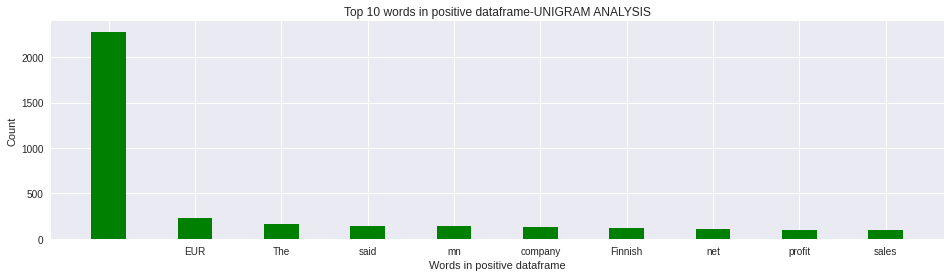

In [ ]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]


plt.figure(1,figsize=(16,4))

plt.bar(pd1,pd2, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")

plt.savefig("positive-unigram.png")
plt.show()



In [ ]:
df_positive.head(10)

,0,1
0,,2281
1,EUR,226
2,The,166
3,said,146
4,mn,138
5,company,132
6,Finnish,114
7,net,109
8,profit,101
9,sales,99


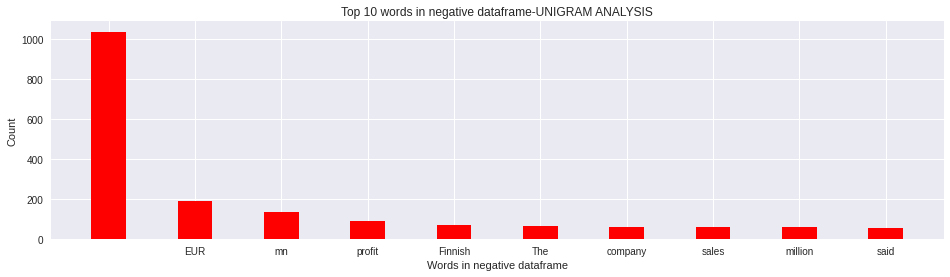

In [ ]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1,ned2, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")

plt.savefig("negative-unigram.png")
plt.show()

In [ ]:
df_negative.head(10)

,0,1
0,,1039
1,EUR,189
2,mn,134
3,profit,91
4,Finnish,70
5,The,62
6,company,59
7,sales,58
8,million,58
9,said,56


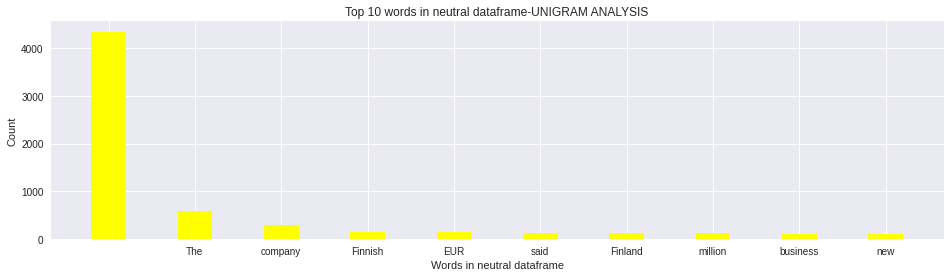

In [ ]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")

plt.savefig("neutral-unigram.png")
plt.show()

In [ ]:
df_neutral.head(10)

,0,1
0,,4349
1,The,584
2,company,298
3,Finnish,146
4,EUR,144
5,said,132
6,Finland,123
7,million,123
8,business,103
9,new,100


**Creating bigrams**

In [ ]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['Its', 'main', 'business', 'area', '', 'Glass', 'Machinery', 'Group', 'Glaston', 'Technologies', '', 'global', 'market', 'leader', 'glass', 'processing', 'machines', '']
Sentence after removing stopwords: ['Olvi', 'posted', 'strong', 'set', 'figures', 'first', 'six', 'months', 'year', '']
Sentence after removing stopwords: ['Profit', 'period', 'EUR', '156', 'mn', 'compared', 'EUR', '141', 'mn', '2007', '']
Sentence after removing stopwords: ['With', 'acquisition', 'Panostaja', 'Oyj', 'expands', 'business', 'area', 'specialising', 'digital', 'printing', '']
Sentence after removing stopwords: ['TeliaSonera', 'secured', 'deliveries', '4G', 'modems', 'support', '3G', '2G', 'second', 'quarter', '2010', '']
Sentence after removing stopwords: ['The', 'company', 'estimates', 'trend', 'demand', 'sports', 'equipment', 'steady', '2006', '', '', 'Amer', 'report', 'said', '']
Sentence after removing stopwords: ['Pretax', 'profit', 'totalled', 'EUR', '808', 'mn', 

In [ ]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

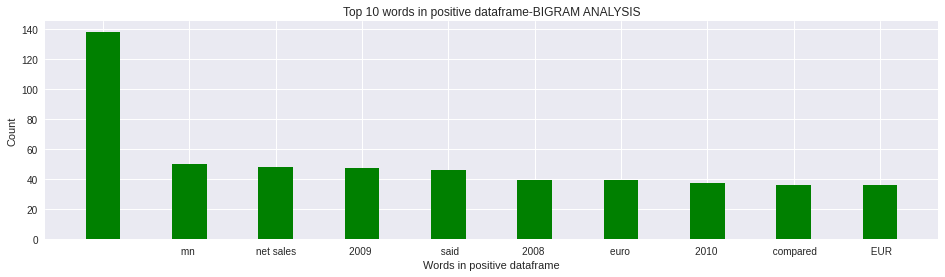

In [ ]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()



In [ ]:
df_positive2.head(10)

,0,1
0,,146
1,net sales,52
2,mn,51
3,said,46
4,2009,45
5,EUR,36
6,euro,35
7,compared,34
8,2007,34
9,HEL,32


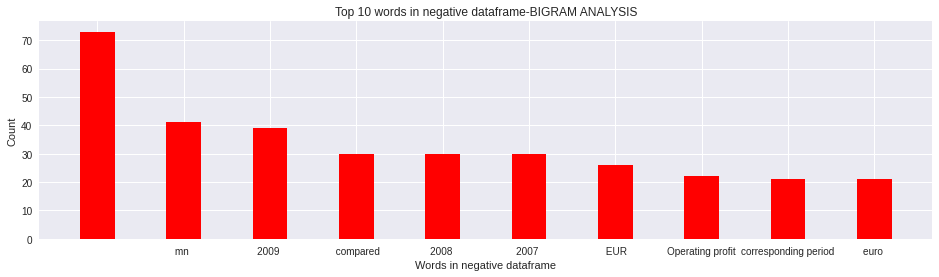

In [ ]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")

plt.savefig("negative-bigram.png")
plt.show()

In [ ]:
df_negative2.head(10)

,0,1
0,,73
1,mn,41
2,2009,39
3,compared,30
4,2008,30
5,2007,30
6,EUR,26
7,Operating profit,22
8,corresponding period,21
9,euro,21


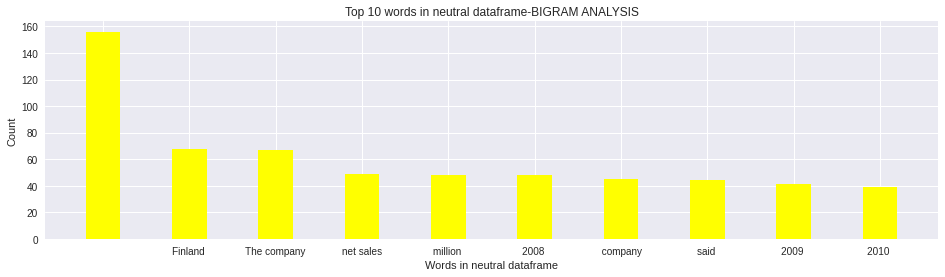

In [ ]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")

plt.savefig("neutral-bigram.png")
plt.show()

In [ ]:
df_neutral2.head(10)

,0,1
0,,156
1,Finland,68
2,The company,67
3,net sales,49
4,million,48
5,2008,48
6,company,45
7,said,44
8,2009,41
9,2010,39


**Creating trigrams**

In [ ]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [ ]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1

Sentence after removing stopwords: ['Its', 'main', 'business', 'area', '', 'Glass', 'Machinery', 'Group', 'Glaston', 'Technologies', '', 'global', 'market', 'leader', 'glass', 'processing', 'machines', '']
Sentence after removing stopwords: ['Olvi', 'posted', 'strong', 'set', 'figures', 'first', 'six', 'months', 'year', '']
Sentence after removing stopwords: ['Profit', 'period', 'EUR', '156', 'mn', 'compared', 'EUR', '141', 'mn', '2007', '']
Sentence after removing stopwords: ['With', 'acquisition', 'Panostaja', 'Oyj', 'expands', 'business', 'area', 'specialising', 'digital', 'printing', '']
Sentence after removing stopwords: ['TeliaSonera', 'secured', 'deliveries', '4G', 'modems', 'support', '3G', '2G', 'second', 'quarter', '2010', '']
Sentence after removing stopwords: ['The', 'company', 'estimates', 'trend', 'demand', 'sports', 'equipment', 'steady', '2006', '', '', 'Amer', 'report', 'said', '']
Sentence after removing stopwords: ['Pretax', 'profit', 'totalled', 'EUR', '808', 'mn', 

In [ ]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

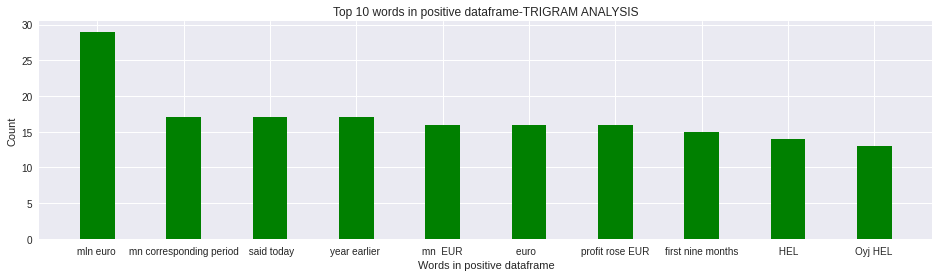

In [ ]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")

plt.savefig("positive-trigram.png")
plt.show()



In [ ]:
df_positive3.head(10)

,0,1
0,mln euro,29
1,mn corresponding period,17
2,said today,17
3,year earlier,17
4,mn EUR,16
5,euro,16
6,profit rose EUR,16
7,first nine months,15
8,HEL,14
9,Oyj HEL,13


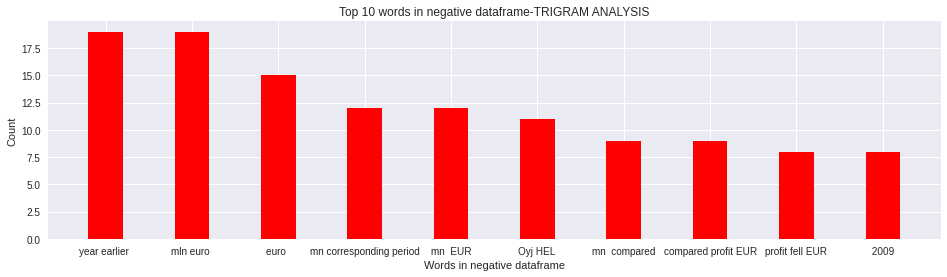

In [ ]:

plt.figure(1,figsize=(16,4))

plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")

plt.savefig("negative-trigram.png")
plt.show()

In [ ]:
df_negative3.head(10)

,0,1
0,year earlier,19
1,mln euro,19
2,euro,15
3,mn corresponding period,12
4,mn EUR,12
5,Oyj HEL,11
6,mn compared,9
7,compared profit EUR,9
8,profit fell EUR,8
9,2009,8


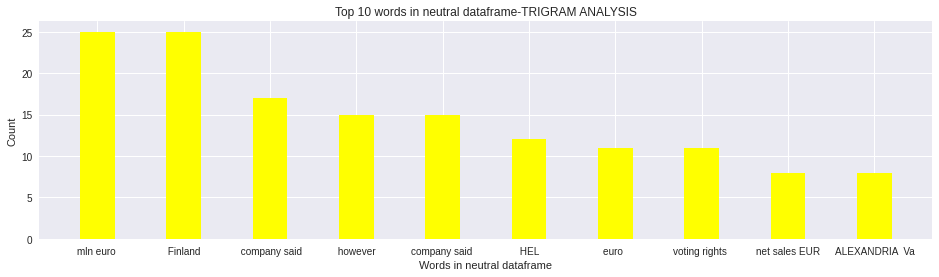

In [ ]:

plt.figure(1,figsize=(16,4))

plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")

plt.savefig("neutral-trigram.png")
plt.show()

In [ ]:
df_neutral3.head(10)

,0,1
0,mln euro,25
1,Finland,25
2,company said,17
3,however,15
4,company said,15
5,HEL,12
6,euro,11
7,voting rights,11
8,net sales EUR,8
9,ALEXANDRIA Va,8


**Using CountVectorizer()**

-can also b used to check the most common bigrams